diabetes(당뇨병) 데이터셋을 활용한 예제(결과치가 안좋은 사례)

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
모델 성능 평가 결과:
MSE: 0.1710
RMSE: 0.4136
R2 Score: 0.2550

특성별 가중치
                         특성        계수
0               Pregnancies  0.010468
1                   Glucose  0.005634
2             BloodPressure -0.002281
3             SkinThickness  0.000532
4                   Insulin -0.000278
5                       BMI  0.015039
6  DiabetesPedigreeFunction  0.111263
7                       Age  0.006460


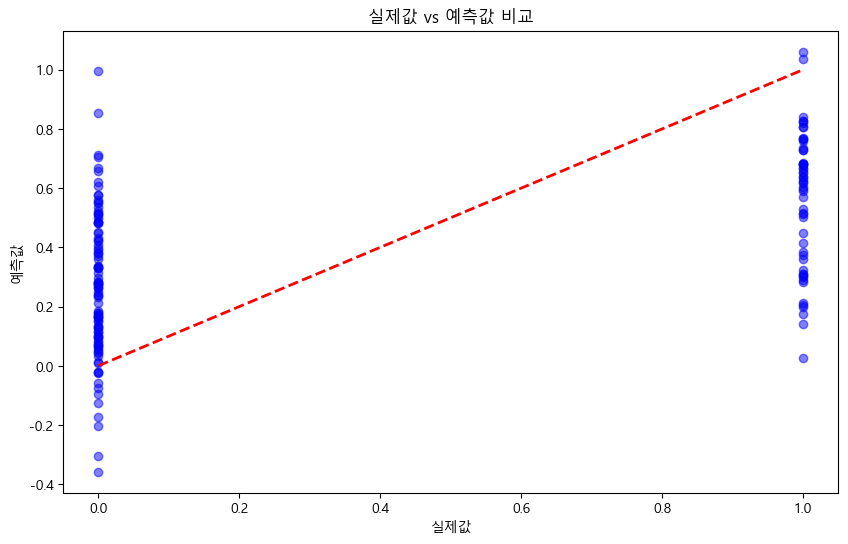

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
diabetes = pd.read_csv('./dataset/diabetes.csv')

print(diabetes.head());

#특성(x)과 타겟(y) 분리
X=diabetes.drop("Outcome",axis=1);
y=diabetes["Outcome"];

#데이터 분할(학습용 80%, 테스트용 20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42);

#선형회귀모델 생성 및 학습
model=LinearRegression();
model.fit(X_train,y_train);

#테스트 세트에 대한 예측
y_pred=model.predict(X_test);

#모델 성능 평가
mse=mean_squared_error(y_test,y_pred);
rmse=np.sqrt(mse);
r2=r2_score(y_test,y_pred);

#결과 출력
print("모델 성능 평가 결과:");
print(f"MSE: {mse:.4f}");
print(f"RMSE: {rmse:.4f}");
print(f"R2 Score: {r2:.4f}");

#각 특성의 계수(가중치) 출력
feature_coefficients=pd.DataFrame({
    "특성":X.columns,
    "계수":model.coef_
});
print("\n특성별 가중치");
print(feature_coefficients);

#실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred,color="blue",alpha=0.5);
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2);
plt.xlabel("실제값");
plt.ylabel("예측값");
plt.title("실제값 vs 예측값 비교");
plt.show();

In [7]:
#예시: 첫번째 테스트 데이터에 대한 예측
sample_data=-X_test.iloc[0:1];
prediction=model.predict(sample_data);
print("\n새로운 데이터 예측결과:");
print(f"예측값: {prediction[0]:.4f}");
print("실제 데이터:",sample_data.values[0]);


새로운 데이터 예측결과:
예측값: -2.2330
실제 데이터: [  -6.    -98.    -58.    -33.   -190.    -34.     -0.43  -43.  ]


랜덤포레스트를 활용한 당뇨병 데이터 알아보기 예제

모델 성능 평가:

교차 검증 점수:
평균 정확도: 0.7657 (+/-0.0715)

분류 리포트:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



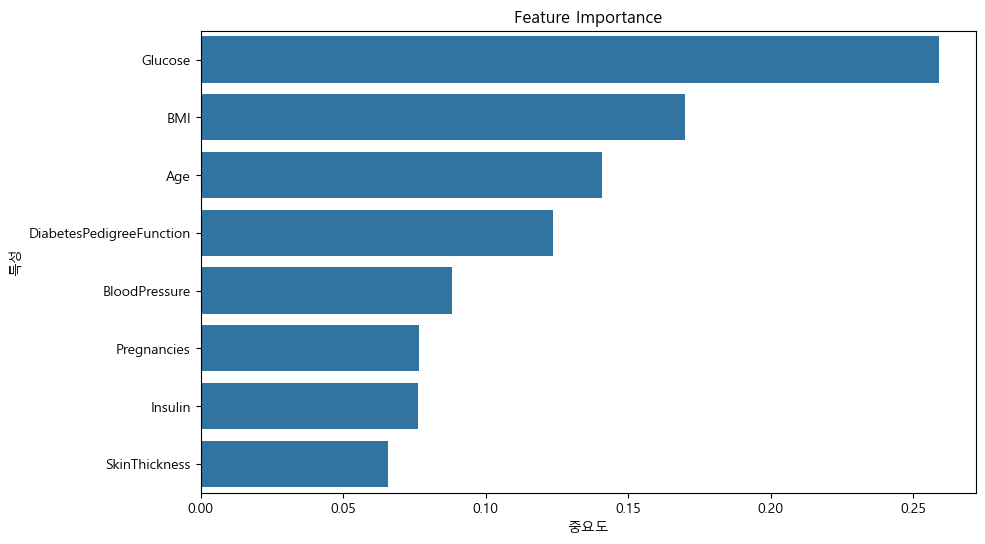

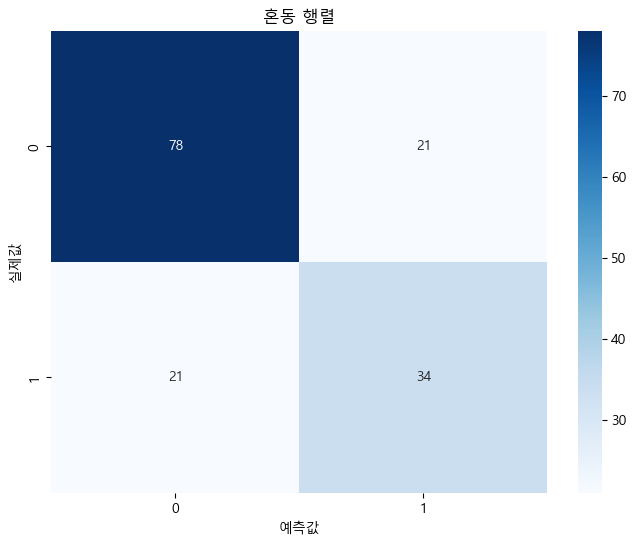

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

#데이터 로드
data=pd.read_csv("./dataset/diabetes.csv");

#특성(X)과 타겟(y) 분리
X=data.drop("Outcome",axis=1);
y=data["Outcome"];

#데이터 전처리: 특성 스케일링
scaler=StandardScaler();
X_scaled=scaler.fit_transform(X);
X_scaled=pd.DataFrame(X_scaled,columns=X.columns);

#데이터 분할
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42);

#랜덤 포레스트 모델 생성 및 학습
rf_model=RandomForestClassifier(n_estimators=100,random_state=42);
rf_model.fit(X_train,y_train);

#예측
y_pred=rf_model.predict(X_test);

#교차 검증 수행
cv_scores=cross_val_score(rf_model,X_scaled,y,cv=5);

#특성 중요도 계산
feature_importance=pd.DataFrame({
    "특성":X.columns,
    "중요도":rf_model.feature_importances_
}).sort_values("중요도",ascending=False);

#결과출력
print("모델 성능 평가:");
print("\n교차 검증 점수:");
print(f"평균 정확도: {cv_scores.mean():.4f} (+/-{cv_scores.std()*2:.4f})");
print("\n분류 리포트:");
print(classification_report(y_test,y_pred));

#특성 중요도 시각화
plt.figure(figsize=(10,6));
sns.barplot(x="중요도",y="특성", data=feature_importance);
plt.title("Feature Importance");
plt.show();

#혼동 행렬 시각화
plt.figure(figsize=(8,6));
cm=confusion_matrix(y_test,y_pred);
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues");
plt.title("혼동 행렬");
plt.xlabel("예측값");
plt.ylabel("실제값");
plt.show();


새로운 환자 데이터 예측 예시:
예측결과: 정상
당뇨병일 확률: 31.00%

예측 신뢰도 분포:


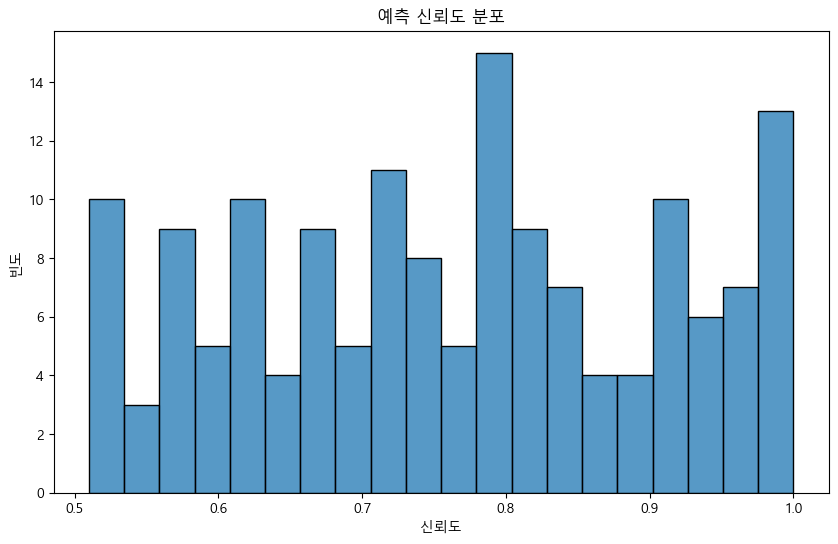

In [14]:
#새로운 환자 데이터로 예측 예시
print("\n새로운 환자 데이터 예측 예시:");
#임의의 환자 데이터 생성
new_patient=X_test.iloc[0:1];
prediction=rf_model.predict(new_patient);
prediction_prob=rf_model.predict_proba(new_patient);

print(f"예측결과: {'당뇨병 환자' if prediction[0]==1 else '정상'}")
print(f"당뇨병일 확률: {prediction_prob[0][1]:.2%}")

#예측 신뢰도 분석
threshold_probs=rf_model.predict_proba(X_test);
confidence_scores=np.max(threshold_probs, axis=1);

print("\n예측 신뢰도 분포:");
plt.figure(figsize=(10,6));
sns.histplot(confidence_scores,bins=20);
plt.title("예측 신뢰도 분포");
plt.xlabel("신뢰도");
plt.ylabel("빈도");
plt.show();

보스톤 집값 분석 예제

### 컬럼 설명 ###
# CRIM(타운별 1인당 범죄울), ZN(25,000평방피트 주택이 차지하는 비율), INDUS(비소매 상업지역 면적비율)
# CHAS(찰스강 인접 여부), NOX(일산화질소 농도), RM(주택 1가구당 평균 방 개수), AGE(1940년대 이전 주택 비율)
# DIS(보스턴 고용 센터까지의 가중거리), TAX(10,000달러당 재산세율), PTRATIO(타운별 학생교사 비율)
# B(타운별 흑인인구 비율 계산식), LSTAT(하위 계층의 비율), MEDV(주택의 중간 가격)


In [ ]:
#필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

#데이터 로드
data=pd.read_csv("dataset/HousingData.csv");

#데이터 확인
print(data.head());
print(data.info());


   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD  TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09    1  296    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97    2  242    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97    2  242    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06    3  222    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06    3  222    18.70 396.90   

   LSTAT  MEDV  
0   4.98 24.00  
1   9.14 21.60  
2   4.03 34.70  
3   2.94 33.40  
4    NaN 36.20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null

In [28]:
#결측값 확인 및 처리
print(data.isnull().sum());

#결측값 제거
data=data.dropna();
print(data.isnull().sum());

#주요 변수 선택
X=data[["CRIM","RM","TAX","LSTAT"]];    #입력변수: CRIM(범죄율), RM(방개수), TAX(세금), LSTAT(하위계층비율)
y=data["MEDV"];                         #타겟변수: MEDV(집값) 

#데이터 분할
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42);

#모델 생성 및 학습
model=LinearRegression();
model.fit(X_train,y_train);

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Mean Squared Error: 41.01145441904804
R2 Score: 0.5137736507938266
회귀 계수: [-0.08498347  5.59693339 -0.00824347 -0.42511164]
절편:  -3.831014747888208


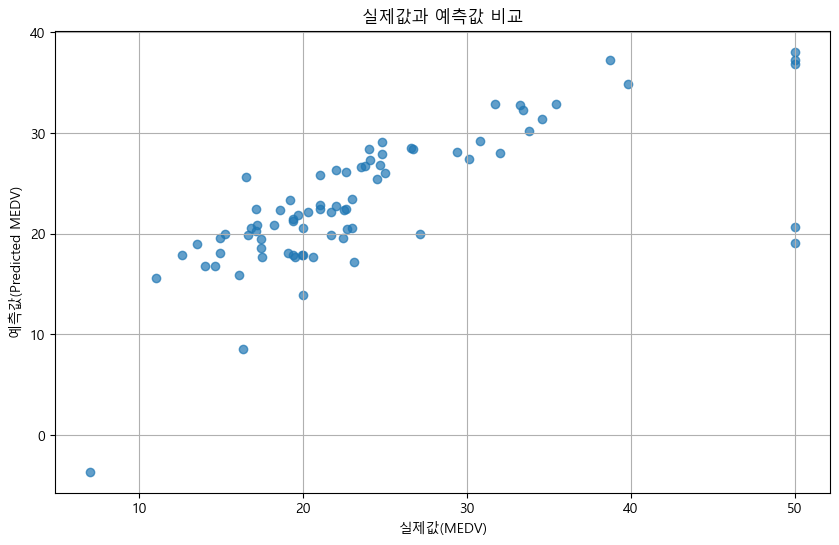

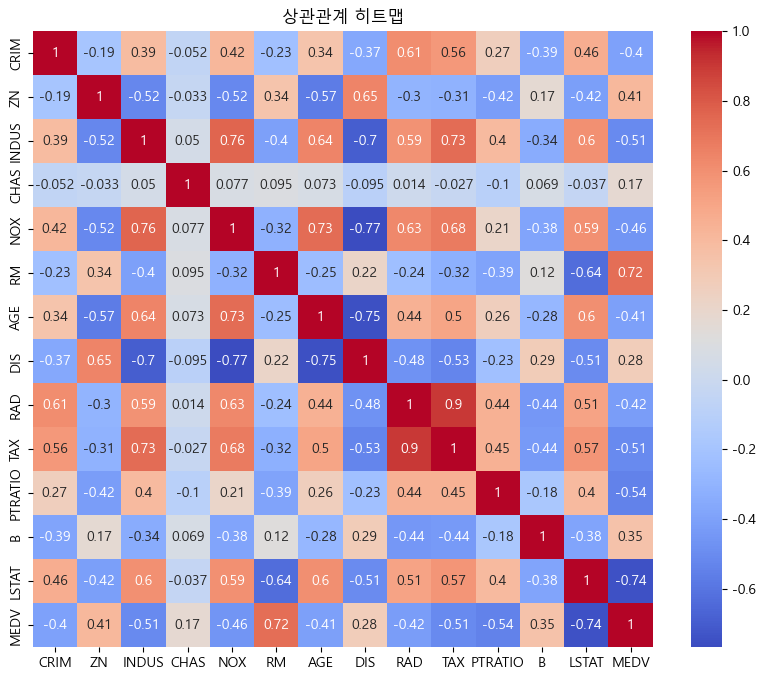

In [32]:
#모델 평가
y_pred=model.predict(X_test);
mse=mean_squared_error(y_test,y_pred);
r2=r2_score(y_test,y_pred);

print(f"Mean Squared Error: {mse}");
print(f"R2 Score: {r2}");

#회귀 계수 출력
print("회귀 계수:", model.coef_);
print("절편: ",model.intercept_);

#결과 시각화
plt.figure(figsize=(10,6));
plt.scatter(y_test,y_pred,alpha=0.7);
plt.xlabel("실제값(MEDV)");
plt.ylabel("예측값(Predicted MEDV)");
plt.title("실제값과 예측값 비교");
plt.grid();
plt.show();

#변수별 상관관계 히트맵
plt.figure(figsize=(10,8));
sns.heatmap(data.corr(),annot=True, cmap="coolwarm");
plt.title("상관관계 히트맵");
plt.show();

랜덤포레스트 모델을 활용한 예제(cf. 다른 회귀모델 성능 비교)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#데이터 로드
data=pd.read_csv("dataset/HousingData.csv");

#데이터 전처리
data=data.dropna()      #결측값 제거
X = data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']];
y = data['MEDV'];

#데이터 분할
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42);

#랜덤 포레스트 모델
rf_model=RandomForestRegressor(random_state=42, n_estimators=100)  #n_esimators: 모델을 구성하는 결정 틀의 개수
rf_model.fit(X_train,y_train);
rf_y_pred=rf_model.predict(X_test);

#랜덤 포레스트 평가
rf_mse=mean_squared_error(y_test,rf_y_pred);
rf_r2=r2_score(y_test, rf_y_pred);
print(f"랜덤 포레스트 -MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}");

랜덤 포레스트 -MSE: 28.63, R2: 0.66


Linear Regression -MSE: 36.34, R2: 0.57
Decision Tree -MSE: 27.30, R2: 0.68

최적 모델: Decision Tree


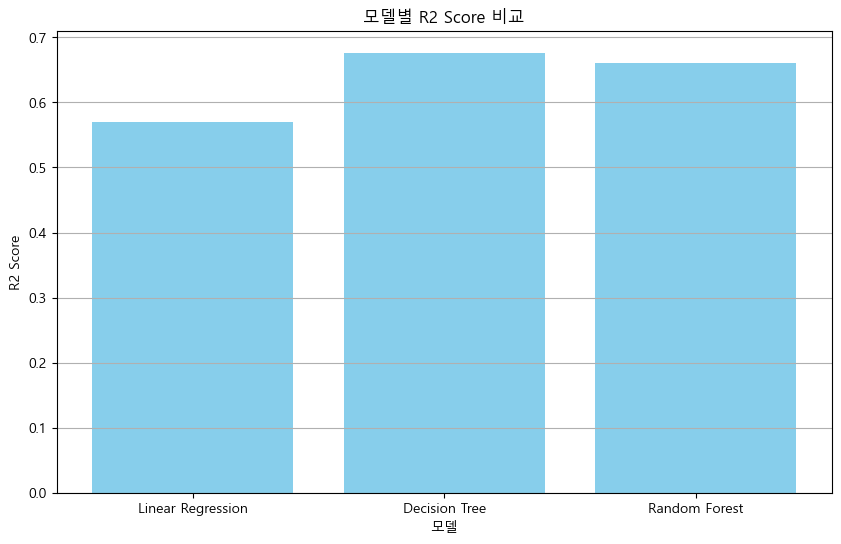

In [37]:
#다른 모델 비교
models={
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(random_state=42)
};

results={};
for name, model in models.items():
    model.fit(X_train, y_train);
    y_pred=model.predict(X_test);
    mse=mean_squared_error(y_test,y_pred);
    r2=r2_score(y_test,y_pred);
    results[name]={"MSE":mse, "R2":r2};
    print(f"{name} -MSE: {mse:.2f}, R2: {r2:.2f}");
    
#최적 모델 선택 및 시각화
results["Random Forest"]={"MSE":rf_mse, "R2": rf_r2};
best_model=max(results, key=lambda x:results[x]["R2"]);
print("\n최적 모델:", best_model);

#결과 시각화
r2_scores=[result["R2"] for result in results.values()];
model_names=list(results.keys());

plt.figure(figsize=(10, 6));
plt.bar(model_names, r2_scores, color="skyblue");
plt.xlabel("모델");
plt.ylabel("R2 Score");
plt.title("모델별 R2 Score 비교");
plt.grid(axis="y");
plt.show();

In [40]:
#랜덤 포레스트 하이퍼파라미터 튜닝(옵션)
param_grid={
    "n_estimators": [50, 100, 200],
    "max_depth":[None, 10, 20],
    "min_samples_split":[2, 5, 10]
};

grid_search=GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,cv=3,scoring="r2");
grid_search.fit(X_train,y_train);
print("\n최적 하이퍼파라미터:", grid_search.best_params_);
best_rf_model=grid_search.best_estimator_;
tuned_rf_y_pred=best_rf_model.predict(X_test);

#튜닝된 모델 평가
tuned_rf_mse=mean_squared_error(y_test, tuned_rf_y_pred);
tuned_rf_r2=r2_score(y_test,tuned_rf_y_pred);
print(f"튜닝된 랜덤 포레스트 -MSE: {tuned_rf_mse:.2f}, R2: {tuned_rf_r2:.2f}")


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
튜닝된 랜덤 포레스트 -MSE: 28.63, R2: 0.66
